# 플랫폼 업로드를 쉽게하기 위한 로컬 개발 코드
- T3Q.ai(T3Q.cep + T3Q.dl): 빅데이터/인공지능 통합 플랫폼
- 플랫폼 업로드를 쉽게하기 위하여 로컬에서 아래의 코드(파일1)를 개발한다.
- 파일 1(파일명): 1_local_platform_image_classification.ipynb

### 전처리 객체 또는 학습모델 객체
- 전처리 객체나 학습모델 객체는 meta_data 폴더 아래에 저장한다.

### 데이터셋 (학습 데이터/테스트 데이터)
- 학습과 테스트에 사용되는 데이터를 나누어 관리한다.
- 학습 데이터: dataset 폴더 아래에 저장하거나 dataset.zip 파일 형태로 저장한다.
- 테스트 데이터: test_dataset 폴더 아래에 저장하거나 test_dataset.zip 파일 형태로 저장한다.

### 로컬 개발 워크플로우(workflow)  
- 로컬 개발 워크플로우를 다음의 4단계로 분리한다.

1. 데이터셋 준비(Data Setup)
- 로컬 저장소에서 전처리 및 학습에 필요한 학습 데이터셋을 준비한다.

2. 데이터 전처리(Data Preprocessing)
- 데이터셋의 분석 및 정규화(Normalization)등의 전처리를 수행한다.
- 데이터를 모델 학습에 사용할 수 있도록 가공한다.
- 추론과정에서 필요한 경우, 데이터 전처리에 사용된 객체를 meta_data 폴더 아래에 저장한다.

3. 학습 모델 훈련(Train Model)
- 데이터를 훈련에 사용할 수 있도록 가공한 뒤에 학습 모델을 구성한다. 
- 학습 모델을 준비된 데이터셋으로 훈련시킨다.
- 정확도(Accuracy)나 손실(Loss)등 학습 모델의 성능을 검증한다.
- 학습 모델의 성능 검증 후, 학습 모델을 배포한다.
- 배포할 학습 모델을 meta_data 폴더 아래에 저장한다.

4. 추론(Inference)
- 저장된 전처리 객체나 학습 모델 객체를 준비한다.
- 추론에 필요한 테스트 데이터셋을 준비한다.
- 배포된 학습 모델을 통해 테스트 데이터에 대한 추론을 진행한다. 

# 인공지능 통합플랫폼(T3Q.ai) 프로세스를 이해하고 인공지능 쉽게 하기

In [1]:
# image_classification_preprocess.py

'''
from image_classification_preprocess_sub import exec_process
'''

import logging

def process_for_train(pm):
    exec_process(pm)
    logging.info('[hunmin log] the end line of the function [process_for_train]')
    

def init_svc(im, rule):
    return {}


def transform(df, params, batch_id):
    logging.info('[hunmin log] df.shape : {}'.format(df.shape))
    logging.info('[hunmin log] type(df) : {}'.format(type(df)))
    logging.info('[hunmin log] the end line of the function [transform]')
    return df

In [2]:
# image_classification_preprocess_sub.py

import os
import numpy as np
import pandas as pd
import zipfile
import logging


def exec_process(pm):
    logging.info('[hunmin log] the start line of the function [exec_process]')

    # 저장 파일 확인
    list_files_directories(pm.source_path)
    
    # pm.source_path의 dataset.zip 파일을
    # pm.target_path 경로에 압축해제
    my_zip_path = os.path.join(pm.source_path,'meta_data.zip')
    extract_zip_file = zipfile.ZipFile(my_zip_path)
    extract_zip_file.extractall(pm.target_path)
    extract_zip_file.close()
    
    # 저장 파일 확인
    list_files_directories(pm.target_path)

    logging.info('[hunmin log] the finish line of the function [exec_process]')

# 저장 파일 확인
def list_files_directories(path):
    # Get the list of all files and directories in current working directory
    dir_list = os.listdir(path)
    logging.info('[hunmin log] Files and directories in {} :'.format(path))
    logging.info('[hunmin log] dir_list : {}'.format(dir_list))  

In [3]:
# train.py
import logging, os
"""
from train_sub import exec_train
import t3qai_client as tc
from t3qai_client import T3QAI_TRAIN_OUTPUT_PATH, T3QAI_TRAIN_MODEL_PATH, \
                            T3QAI_TRAIN_DATA_PATH, T3QAI_TEST_DATA_PATH, T3QAI_MODULE_PATH
"""

def main():
    result = None
    result_msg = "success"
    tc.train_start()
    try:
        train()
    except Exception as e:
        result = e
        result_msg = e
        logging.info('error log : {}'.format(e))
    tc.train_finish(result, result_msg)

def train():
    exec_train()
    logging.info('[hunmin log] the end line of the function [train]')

#if __name__ == '__main__':
#    main()

In [4]:
#  train_sub.py

"""
import t3qai_client as tc
from t3qai_client import T3QAI_TRAIN_OUTPUT_PATH, T3QAI_TRAIN_MODEL_PATH, \
                            T3QAI_TRAIN_DATA_PATH, T3QAI_TEST_DATA_PATH, T3QAI_MODULE_PATH
"""

# Imports
import os
import numpy as np
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import utils
# from tensorflow.keras import layers
import logging
import matplotlib.pyplot as plt

logging.info(f'[hunmin log] tensorflow ver : {tf.__version__}')

# 사용할 gpu 번호를 적는다.
# os.environ["CUDA_VISIBLE_DEVICES"]='0'

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         tf.config.experimental.set_visible_devices(gpus, 'GPU')
#         logging.info('[hunmin log] gpu set complete')
#         logging.info('[hunmin log] num of gpu: {}'.format(len(gpus)))
    
#     except RuntimeError as e:
#         logging.info('[hunmin log] gpu set failed')
#         logging.info(e)
        
        
def exec_train():
    logging.info('[hunmin log] the start line of the function [exec_train]')
    logging.info('[hunmin log] T3QAI_TRAIN_DATA_PATH : {}'.format(T3QAI_TRAIN_DATA_PATH))
    
    # 저장 파일 확인
    list_files_directories(T3QAI_TRAIN_DATA_PATH)
    my_path = os.path.join(T3QAI_TRAIN_DATA_PATH, 'dataset') + '/'
    
    # 카테고리
    dataset=['ant', 'apple', 'bus', 'butterfly', 'cup', 'envelope', 'fish', 'giraffe', 'lightbulb', 'pig']
    dataset_num = len(dataset) #10

    # 경로에 있는 numpy를 load하고 dataset_numpy list에 추가한다.
    dataset_numpy = []
    for i in range (dataset_num):
        ad = my_path + str(dataset[i]) + '.npy'
        dataset_numpy.append(np.load(ad))
    
    for i in range (dataset_num):
        logging.info('[hunmin log] : {}'.format(dataset_numpy[i].shape))
    
    np.set_printoptions(linewidth = 116)
    # dataset_numpy[5] 가 envelope numpy 이다.
    logging.info('[hunmin log] envelope : {}'.format(dataset_numpy[5][0]))

    # 카테고리별로 같은 수의 이미지를 훈련시키기 위해 훈련시키고자 하는 이미지의 개수를 정해준다.
    idx = 1000
    
    # 데이터 정규화 (Normalization) & 데이터 합치기 & 레이블 생성
    # X: 입력 이미지 배열 데이터
    # Y: 정답 레이블 데이터
    # 정규화 및 정답 레이블 생성
    X = np.array([data_numpy[:idx, :]/255. for data_numpy in dataset_numpy]).astype('float32')
    X = X.reshape(-1, 28*28)
    Y = np.array([i for i in range(10) for j in range(idx)]).astype('float32')

    # 훈련 & 평가 데이터셋 생성
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

    # 모델 훈련에 사용할 수 있는 형태로 변경
    # X의 값을 [samples][pixels][width][height] 형태로 reshape한다.
    X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
    X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')
    
    # reshape된 결과 확인 및 원래 배열의 형태와 비교
    logging.info('[hunmin log] X_train : {}'.format(X_train.shape))
    logging.info('[hunmin log] X_train_cnn : {}'.format(X_train_cnn.shape))

    
    # Y의 배열에 one-hot-encoding 진행
    Y_train_cnn = utils.to_categorical(Y_train)
    Y_test_cnn = utils.to_categorical(Y_test)
    num_classes = Y_test_cnn.shape[1] # class는 총 10개이다.

    # encoding된 결과 확인 및 원래 배열의 형태와 비교
    logging.info('[hunmin log] Y_train : {}'.format(Y_train.shape))
    logging.info('[hunmin log] Y_train_cnn : {}'.format(Y_train_cnn.shape))
    logging.info('[hunmin log] class number : {}'.format(num_classes))
    
    # 모델 구축 (Build Model)
    # 이미지 분류를 위해 아주 간단한 CNN 모델을 Keras를 이용하여 구축하고자 한다.
    
    # 단일 gpu 혹은 cpu학습
    if len(gpus) < 2:
        model = model_build_and_compile(num_classes)
    # multi-gpu
    else:
        strategy = tf.distribute.MirroredStrategy()
        logging.info('[hunmin log] gpu devices num {}'.format(strategy.num_replicas_in_sync))
        with strategy.scope():
            model = model_build_and_compile(num_classes)

    # 사용자 입력 파라미터
    user_params = tc.train_load_param()
    batch_size = int(user_params["batch_size"])
    epochs = int(user_params["epoch"])

    # gpu에 따른 batch_size 설정
    batch_size = batch_size * len(gpus) if len(gpus) > 0 else batch_size

    # 모델 학습 (Train Model)
    history = model.fit(X_train_cnn, Y_train_cnn, 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        validation_split=0.1, 
                        verbose=0, 
                        callbacks=[LossAndErrorPrintingCallback()]
                       )
    
    # 모델 평가 (Evaluate Model)
    loss, acc = model.evaluate(X_test_cnn, Y_test_cnn, verbose=0, callbacks=[LossAndErrorPrintingCallback()])

    # 로컬 시각화
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    ax[0].plot(acc, label = 'accuracy')
    ax[0].plot(val_acc, label = 'val_accuracy')
    ax[0].set_title("Accuracy")
    ax[1].plot(loss, label = 'Loss')
    ax[1].plot(val_loss, label = 'val_loss')
    ax[1].set_title("Loss")
    fig.savefig(os.path.join(T3QAI_TRAIN_OUTPUT_PATH, 'Accuracy_Loss.png'))
    
    logging.info('[hunmin log] loss : {}'.format(loss))
    logging.info('[hunmin log] acc : {}'.format(acc))

    ###########################################################################
    ## 플랫폼 시각화
    ###########################################################################
    """
    plot_metrics(tc, history, model, X_test_cnn, Y_test_cnn)
    """
    
    logging.info('[hunmin log] T3QAI_TRAIN_MODEL_PATH : {}'.format(T3QAI_TRAIN_MODEL_PATH))
    model.save(os.path.join(T3QAI_TRAIN_MODEL_PATH, 'cnn_model.h5'))
    
    # 저장 파일 확인
    list_files_directories(T3QAI_TRAIN_MODEL_PATH)
    
    logging.info('[hunmin log] the finish line of the function [exec_train]')
    
###########################################################################
## exec_train() 호출 함수 
###########################################################################
# for epoch, loss
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs={}):
        logging.info('[hunmin log] For epoch {}, loss is {:.2f}.'.format(batch+1, logs['loss']))

def model_build_and_compile(num_classes):
    #모델 구축
    model = keras.Sequential(
        [
            layers.Input(shape=(28,28,1)),
            layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
            layers.Dropout(0.25),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(32, activation="relu"),
            layers.Dropout(0.25),
            layers.Dense(num_classes, activation="softmax")
        ]
    )
    logging.info('[hunmin log] model.summary() :')
    model.summary(print_fn=logging.info)
    
    # 모델 컴파일 (Compile Model)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model
    
# 시각화
def plot_metrics(tc, history, model, x_test, y_test):
    from sklearn.metrics import confusion_matrix
    
    accuracy_list = history.history['accuracy']
    loss_list = history.history['loss']
    
    for step, (acc, loss) in enumerate(zip(accuracy_list, loss_list)):
        metric={}
        metric['accuracy'] = acc
        metric['loss'] = loss
        metric['step'] = step
        tc.train_save_stat_metrics(metric)

    predict_y = np.argmax(model.predict(x_test), axis = 1).tolist()
    actual_y = np.argmax(y_test, axis = 1).tolist()
    
    eval_results={}
    eval_results['predict_y'] = predict_y
    eval_results['actual_y'] = actual_y
    eval_results['accuracy'] = history.history['val_accuracy'][-1]
    eval_results['loss'] = history.history['val_loss'][-1]

    # calculate_confusion_matrix(eval_results)
    eval_results['confusion_matrix'] = confusion_matrix(actual_y, predict_y).tolist()
    tc.train_save_result_metrics(eval_results)
    logging.info('[hunmin log] accuracy and loss curve plot for platform')
    
# 저장 파일 확인
def list_files_directories(path):
    # Get the list of all files and directories in current working directory
    dir_list = os.listdir(path)
    logging.info('[hunmin log] Files and directories in {} :'.format(path))
    logging.info('[hunmin log] dir_list : {}'.format(dir_list)) 

In [5]:
# inference_service.py

"""
from inference_service_sub import exec_init_model, exec_inference_dataframe, exec_inference_file
"""

import logging
logger = logging.getLogger()
logger.setLevel('INFO')

def init_model():
    params = exec_init_model()
    logging.info('[hunmin log] the end line of the function [init_model]')
    return { **params }


def inference_dataframe(df, model_info_dict):
    result = exec_inference_dataframe(df, model_info_dict)
    logging.info('[hunmin log] the end line of the function [inference_dataframe]')
    return { **result }


def inference_file(files, model_info_dict):
    result = exec_inference_file(files, model_info_dict)
    logging.info('[hunmin log] the end line of the function [inference_file]')
    return result

In [6]:
# inference_service_sub.py
import os
import io
import base64
import logging
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

"""
from t3qai_client import DownloadFile
import t3qai_client as tc
from t3qai_client import T3QAI_TRAIN_OUTPUT_PATH, T3QAI_TRAIN_MODEL_PATH, T3QAI_TRAIN_DATA_PATH, \
                            T3QAI_TEST_DATA_PATH, T3QAI_MODULE_PATH, T3QAI_INIT_MODEL_PATH
"""


def exec_init_model():
    model_path = os.path.join(T3QAI_INIT_MODEL_PATH, 'cnn_model.h5')
    model = load_model(model_path)
    model_info_dict = {
        "model": model
    }
    return model_info_dict

def exec_inference_dataframe(df, model_info_dict):
    
    logging.info('[hunmin log] the start line of the function [exec_inference_dataframe]')
    
    ## 학습 모델 준비
    model = model_info_dict['model']
    labels = ['ant', 'apple', 'bus', 'butterfly', 'cup', 'envelope', 'fish', 'giraffe', 'lightbulb', 'pig']
    
    # image preprocess
    img_base64 = df.iloc[0, 0]
    image_bytes = io.BytesIO(base64.b64decode(img_base64))
    image = Image.open(image_bytes).convert('L')
    image = image.resize((28, 28))
    image = np.invert(image).astype('float32')/255.
    image = image.reshape(-1, 28, 28, 1)
    
    # data predict
    y_pred = model.predict(image, verbose=0)
    y_pred_idx = np.argmax(y_pred, axis=1)
    
    # inverse transform
    result = {'inference' : [labels[y_pred_idx[0]]]}
    logging.info('[hunmin log] result : {}'.format(result))

    return result

def exec_inference_file(files, model_info_dict):
    
    """파일기반 추론함수는 files와 로드한 model을 전달받습니다."""
    logging.info('[hunmin log] the start line of the function [exec_inference_file]')
    model = model_info_dict['model']
    labels = ['ant', 'apple', 'bus', 'butterfly', 'cup', 'envelope', 'fish', 'giraffe', 'lightbulb', 'pig']

    inference_result = []
    
    for one_file in files:
        logging.info(f'[hunmin log] inference: {one_file.filename}')
        inference_file = one_file.file
        image = Image.open(inference_file).convert('L')
        image = image.resize((28, 28))
        image = np.invert(image).astype('float32')/255.
        image = image.reshape(-1, 28, 28 , 1)

        logging.info(f'[hunmin log] predict: {one_file.filename}')
        # data predict
        y_pred = model.predict(image, verbose=0)
        y_pred_idx = np.argmax(y_pred, axis=1)
        
        inference_result.append(labels[y_pred_idx[0]])
        
#     result = [DownloadFile(file_path=T3QAI_TRAIN_OUTPUT_PATH + '/Accuracy_Loss.png', file_name='result.jpg'), 
#               DownloadFile(file_path=T3QAI_TRAIN_OUTPUT_PATH + '/Accuracy_Loss.png', file_name='result2.jpg')]

    result = {'inference' : inference_result}
    return result

In [7]:
import os
import shutil
import tempfile
import base64
import pandas as pd

import ipywidgets
from ipywidgets import FileUpload
from IPython.display import FileLink

# t3qai_client 클래스: t3qai_client 객체
class t3qai_client:
    def train_start(self):
        return None

    def train_finish(self, result, result_msg):
        if result_msg != "success":
            raise Exception(result_msg)
        else:
            logging.info(result)
            logging.info("train finish")

    def train_load_param(self):
        '''set_param'''
        epoch = 20
        batch_size = 16
        params = {"epoch" : epoch, 'batch_size' : batch_size}
        return { **params }

class PM:
    def __init__(self):
        self.source_path = './'
        self.target_path = './meta_data'
        
class UploadFile:
    def __init__(self, file, filename):
        self.file = file
        self.filename = filename

def DownloadFile(file_name, file_obj = None, file_path = None):
    file_route = './meta_data/DownloadFiles'
    os.makedirs(file_route, exist_ok = True)
    file_dir = os.path.join(file_route, file_name)
    if (file_obj == None) == (file_path == None):
        Err_msg = "[DownloadFile Error]: Only one of the 'file_path' or 'file_obj' arguments is required."
        Err_msg += f"{0 if file_obj==None else 2} arguments entered."
        raise Exception(Err_msg)
    elif(file_obj != None):
        file_obj.seek(0)
        file_read = base64.b64encode(file_obj.read()).decode('utf-8')
        binary_file = base64.b64decode(file_read)
        with open(file_dir, 'wb') as f:
            f.write(binary_file)
    elif(file_path != None):
        shutil.copyfile(file_path, file_dir)
        
    return FileLink(file_dir)

pm = PM()

T3QAI_TRAIN_OUTPUT_PATH = './meta_data'
T3QAI_TRAIN_MODEL_PATH = './meta_data'
T3QAI_TRAIN_DATA_PATH = './meta_data'
T3QAI_TEST_DATA_PATH = './meta_data'
T3QAI_MODULE_PATH = './meta_data'
T3QAI_INIT_MODEL_PATH = './meta_data'


# t3qai_client 객체
tc = t3qai_client()
print('T3QAI_TRAIN_OUTPUT_PATH:', T3QAI_TRAIN_OUTPUT_PATH)
print('T3QAI_TRAIN_MODEL_PATH:', T3QAI_TRAIN_MODEL_PATH)
print('T3QAI_TRAIN_DATA_PATH:', T3QAI_TRAIN_DATA_PATH)
print('T3QAI_TEST_DATA_PATH:', T3QAI_TEST_DATA_PATH)
print('T3QAI_MODULE_PATH:', T3QAI_MODULE_PATH)
print('T3QAI_INIT_MODEL_PATH:', T3QAI_INIT_MODEL_PATH)

# init_svc(im, rule) 함수 입력
im = None
rule = None
# transform(df, params, batch_id) 함수 입력
batch_id = 0


import io
import pandas as pd

# base64 encoded image - apple.jpg
data = [['iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACySURBVEhL7ZLRDoAgCEWt//9nc8EIEepStvXQeWkyPEKw1FrLbFb+TuWXzichXXb4cAokJR0tH+JFK21G8V6CSqlApMxGelBIsVBHeOOEzZYGdRzpussfL7eIazHPa0wrx0GMdBSiuMbkdINyb5og0gRL3dTbcPtNOpYZveQ2pA1n0hTakF5+hA9Lzd87pNFYLhkvsvT2lMhorndluxkRUuCYbzcp9ROi55+up8sLK1XKBj1wbx3DelAOAAAAAElFTkSuQmCC']]
df = pd.DataFrame(data)
print('df: ', df)
print('df.dtypes:', df.dtypes)

# inference_file 함수 추론
files = []

uploader = FileUpload(accept='*', multiple=True, description='select data', button_style='danger')
def uploader_change(change):
    uploader.button_style='success'
    count = len(uploader.value)
    uploader._counter = count
    files.clear()
    for file_num in range(count):
        temp_data = tempfile.TemporaryFile()
        if ipywidgets.__version__[0] == '7':
            temp_data.write(list(uploader.value.values())[file_num]['content'])
            file = UploadFile(temp_data, pd.DataFrame(list(uploader.value.values())[file_num]).iloc[1,0])
        elif int(ipywidgets.__version__[0]) > 7:
            temp_data.write(uploader.value[file_num].content)
            file = UploadFile(temp_data, uploader.value[file_num].name)
        files.append(file)

uploader.observe(uploader_change, 'value')

T3QAI_TRAIN_OUTPUT_PATH: ./meta_data
T3QAI_TRAIN_MODEL_PATH: ./meta_data
T3QAI_TRAIN_DATA_PATH: ./meta_data
T3QAI_TEST_DATA_PATH: ./meta_data
T3QAI_MODULE_PATH: ./meta_data
T3QAI_INIT_MODEL_PATH: ./meta_data
df:                                                     0
0  iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAA...
df.dtypes: 0    object
dtype: object


In [8]:
%%time
process_for_train(pm)

INFO:root:[hunmin log] the start line of the function [exec_process]
INFO:root:[hunmin log] Files and directories in ./ :
INFO:root:[hunmin log] dir_list : ['README.txt', 'dataset.zip', 'T3Q.ai_platform_image_classification', 'meta_data', '2_1_1_platform_image_classification_preprocess.py', '.ipynb_checkpoints', '2_2_2_platform_image_classification_train_sub.py', '0_local_image_classification.ipynb', '1_local_platform_image_classification.ipynb', '0_local_image_classification_requirement.txt', '2_2_1_platform_image_classification_train.py', '2_1_2_platform_image_classification_preprocess_sub.py', 'LICENSE.txt', 'test_dataset.zip', '2_2_3_platform_image_classification_inference_service.py', '2_2_4_platform_image_classification_inference_service_sub.py']
INFO:root:[hunmin log] Files and directories in ./meta_data :
INFO:root:[hunmin log] dir_list : ['cnn_model.h5', 'dataset', 'test_dataset', 'Accuracy_Loss.png', 'DownloadFiles']
INFO:root:[hunmin log] the finish line of the function [exe

CPU times: user 6.69 s, sys: 5.39 s, total: 12.1 s
Wall time: 13.7 s


INFO:root:[hunmin log] the start line of the function [exec_train]
INFO:root:[hunmin log] T3QAI_TRAIN_DATA_PATH : ./meta_data
INFO:root:[hunmin log] Files and directories in ./meta_data :
INFO:root:[hunmin log] dir_list : ['cnn_model.h5', 'dataset', 'test_dataset', 'Accuracy_Loss.png', 'DownloadFiles']
INFO:root:[hunmin log] : (124612, 784)
INFO:root:[hunmin log] : (144722, 784)
INFO:root:[hunmin log] : (166208, 784)
INFO:root:[hunmin log] : (117999, 784)
INFO:root:[hunmin log] : (130721, 784)
INFO:root:[hunmin log] : (134863, 784)
INFO:root:[hunmin log] : (134150, 784)
INFO:root:[hunmin log] : (127182, 784)
INFO:root:[hunmin log] : (120879, 784)
INFO:root:[hunmin log] : (186770, 784)
INFO:root:[hunmin log] envelope : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  

CPU times: user 1min 8s, sys: 1min 12s, total: 2min 20s
Wall time: 2min 57s


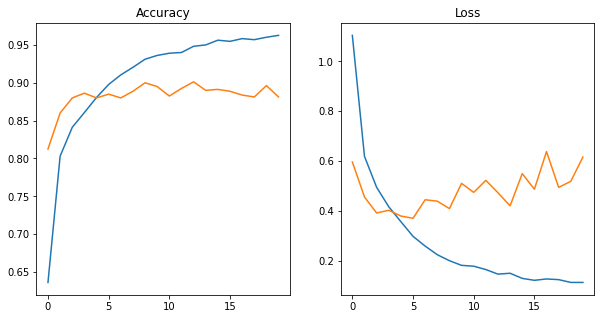

In [9]:
%%time
# main() 함수에서 train() 함수 실행
main()

In [10]:
%%time
params = init_svc(im, rule)

CPU times: user 5 µs, sys: 5 µs, total: 10 µs
Wall time: 16.2 µs


In [11]:
%%time
df = transform(df, params, batch_id)

INFO:root:[hunmin log] df.shape : (1, 1)
INFO:root:[hunmin log] type(df) : <class 'pandas.core.frame.DataFrame'>
INFO:root:[hunmin log] the end line of the function [transform]


CPU times: user 129 µs, sys: 4.2 ms, total: 4.33 ms
Wall time: 3.71 ms


In [12]:
%%time
model_info_dict = init_model()

INFO:root:[hunmin log] the end line of the function [init_model]


CPU times: user 121 ms, sys: 7.62 ms, total: 129 ms
Wall time: 129 ms


### CASE [추론 입력 타입 - 추론 출력 타입] : 총 4가지
추론 입력 타입 : DataFrame &rarr; 추론 출력 타입 : Dictionary (1가지)    
추론 입력 타입 : File &rarr; 추론 출력 타입 : Dictionary, DownloadFile, DownloadFile의 List (3가지)  

### CASE  [DataFrame - Dictionary]
DataFrame 입력에 대한 추론 결과를 딕셔너리(Dictionary) 형태로 리턴(return)

In [13]:
%%time
inference_dataframe(df, model_info_dict)

INFO:root:[hunmin log] the start line of the function [exec_inference_dataframe]
INFO:root:[hunmin log] result : {'inference': ['apple']}
INFO:root:[hunmin log] the end line of the function [inference_dataframe]


CPU times: user 219 ms, sys: 16.4 s, total: 16.6 s
Wall time: 35.6 s


{'inference': ['apple']}

### CASE  [File - Dictionary]
File 에 대한 추론 결과를 딕셔너리(Dictionary) 형태로 리턴(return)

 1. 아래 Cell을 실행하면 select data 버튼이 생성됩니다.
 2. 생성된 select data 버튼을 눌러 추론할 데이터를 선택하세요.
 3. 선택 후 **inference_file(files, model_info_dict)** 을 실행하세요.

In [14]:
# uploader widget(해당 커널 output의 버튼)에 파일을 업로드 한 뒤 infernece_file으로 추론합니다.
display(uploader)

FileUpload(value={}, accept='*', button_style='danger', description='select data', multiple=True)

In [17]:
%%time
inference_file(files, model_info_dict)

INFO:root:[hunmin log] the start line of the function [exec_inference_file]
INFO:root:[hunmin log] inference: my_ant.png
INFO:root:[hunmin log] predict: my_ant.png
INFO:root:[hunmin log] the end line of the function [inference_file]


CPU times: user 89.3 ms, sys: 3.24 ms, total: 92.5 ms
Wall time: 88.6 ms


{'inference': ['ant']}

### CASE  [File - DownloadFile / DownloadFile의 List]
File 입력에 대한 추론 결과를 DownloadFile 형태 혹은 DownloadFile의 List 형태로 리턴(return)

In [18]:
%%time
# inference의 return을 DownloadFile 으로 할때 실행합니다.
inference_result = inference_file(files, model_info_dict)

if type(inference_result) == list:
    display(*inference_result)
else:
    display(inference_result)

INFO:root:[hunmin log] the start line of the function [exec_inference_file]
INFO:root:[hunmin log] inference: my_ant.png
INFO:root:[hunmin log] predict: my_ant.png
INFO:root:[hunmin log] the end line of the function [inference_file]


{'inference': ['ant']}

CPU times: user 83 ms, sys: 14.4 ms, total: 97.4 ms
Wall time: 92.6 ms
